## References

- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- YouTube Tutorial
  - [Part1](https://www.youtube.com/watch?v=NozaWUkJ3YM)


## Init Parameters


In [26]:
from rdkit import Chem
from rdkit.Chem import Draw

from src import SDF_DIR

file = "5-Bromo-1,2-dichloro-3-fluorobenzene.sdf"

## Sandbox


In [27]:
# Loads Molecule from file to python object
suppl: Chem.SDMolSupplier = Chem.SDMolSupplier(f"{SDF_DIR.joinpath(file)}")

# Test if each molecule was loadded correctly
for molecule in suppl:
    assert molecule is not None

mols = [x for x in suppl]  # one line for loop syntax, must know, very handy
print(f"The file '{file}' contains '{len(mols)}' molecule(s).")

assert len(mols) > 0  # make sure the file was loaded correctly
mol = mols[0]  # SDF files can contain multiple molecules - we work with just one now


The file '5-Bromo-1,2-dichloro-3-fluorobenzene.sdf' contains '1' molecule(s).


In [28]:
# Calling some basic functions on molecule object
print(f"Heavy Atom Number: {mol.GetNumAtoms()}")
print(f"All Atom Number: {mol.GetNumAtoms(onlyExplicit=False)}")
print(f"SMILES format: '{Chem.MolToSmiles(mol)}'")


Heavy Atom Number: 10
All Atom Number: 12
SMILES format: 'Fc1cc(Br)cc(Cl)c1Cl'


In [ ]:
# Calling some basic functions on atoms objects
atoms: list[Chem.Atom] = [a for a in mol.GetAtoms()]
for atom in atoms:
    if atom.GetHybridization() == Chem.HybridizationType.SP2:
        print(
            f"""Atom: {atom.GetSymbol()}, AtomicNumber: {atom.GetAtomicNum()}, Mass: {atom.GetMass()}, GetIsAromatic: {atom.GetIsAromatic()}, GetHybridization: {atom.GetHybridization()}"""
        )


Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: True, GetHybridization: SP2


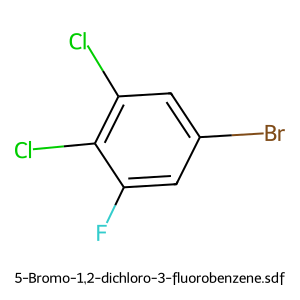

In [30]:
# Simple Drawing
img = Draw.MolToImage(mol, legend=file)
img